 Author: Mahsa Keshavarz

## Introduction

There are four major categories of diseases associated with sand and dust storms: Respiratory, Cardiovascular, Eye, and Skin ailments.The dataset contains daily hospital visits for this diseases during a 4.5-year-old period in Ahwaz city.To gain a deeper understanding, we looked at respiratory and cardiovascular diseases using methods of time-series analysis.

In [287]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

plt.style.use('bmh')

import warnings
warnings.filterwarnings('ignore')

In [288]:
path = R'../Data/10_dust_diseases_data.csv'
df = pd.read_csv(path)

In [289]:
# Diseases main categories

df['chapter(level_1)'].unique()

array(['I00-I99', 'J00-J99', 'H00-H59', 'L00-L99'], dtype=object)

In [290]:
# Converting addmition dates values to datetime objects
df['gregorian_date'] = pd.to_datetime(df['gregorian_date'], format='%Y/%m/%d')

# checking for missing values in addmition date
df['gregorian_date'].isnull().sum()

0

In [291]:
df.sort_values('gregorian_date', ascending=True, inplace=True)

In [292]:
df['visit'] = 1

## Daily hospital visits for respirotery diseases

In [293]:
# selecting patients with respiretory diseases

resp = df[df['chapter(level_1)'] == 'J00-J99']

In [294]:
resp.shape

(16659, 29)

In [295]:
resp.sort_values('gregorian_date', ascending=True, inplace=True)

In [296]:
# Creating a dataframe for respiretory daily hospital vists

resp_visits = pd.DataFrame()
resp_visits['date'] = resp['gregorian_date'].unique()
resp_visits['resp_visits'] = resp.groupby('gregorian_date')['visit'].count().values

In [297]:
# adding dates with no respiretory vistis to dataframes

## step 1 = create a dataframe with respiretoty visits dates
resp_visits_test = pd.DataFrame()
resp_visits_test['date'] = resp['gregorian_date'].unique()
resp_visits_test['resp_visits'] = 0

## step 2 = create a datafarme with all dates
idx = pd.date_range('03-21-2015', '09-22-2019')
idx_df = pd.DataFrame()
idx_df['date'] = idx
idx_df['resp_visits'] = 0
idx_df.shape

## step 3 = compare them
no_resp_df = pd.concat([resp_visits_test,idx_df]).drop_duplicates(keep=False)

## step 4  = add dates with no respirotery patients
resp_visits = resp_visits.append(no_resp_df, ignore_index = True)

resp_visits.sort_values('date', ascending=True, inplace=True)

In [298]:
resp_visits.shape

(1647, 2)

In [299]:
resp_visits.head()

,date,resp_visits
0,2015-03-21,23
1,2015-03-22,11
2,2015-03-23,10
3,2015-03-24,6
4,2015-03-25,11


## Daily hospital visits for cardiovascular diseases

In [300]:
# selecting patients with cardiovasculare diseases

cardio = df[df['chapter(level_1)'] == 'I00-I99']

In [301]:
cardio.shape

(36202, 29)

In [302]:
cardio.sort_values('gregorian_date', ascending=True, inplace=True)

In [303]:
# Creating a dataframe for cardiovascular daily hospital vists

cardio_visits = pd.DataFrame()
cardio_visits['date'] = cardio['gregorian_date'].unique()
cardio_visits['cardio_visits'] = cardio.groupby('gregorian_date')['visit'].count().values

In [304]:
cardio_visits.shape

(1647, 2)

In [305]:
cardio_visits.head()

,date,cardio_visits
0,2015-03-21,7
1,2015-03-22,9
2,2015-03-23,6
3,2015-03-24,11
4,2015-03-25,5


## Daily Hospital Visits Plots and Trends

In [306]:
from statsmodels.tsa.seasonal import seasonal_decompose

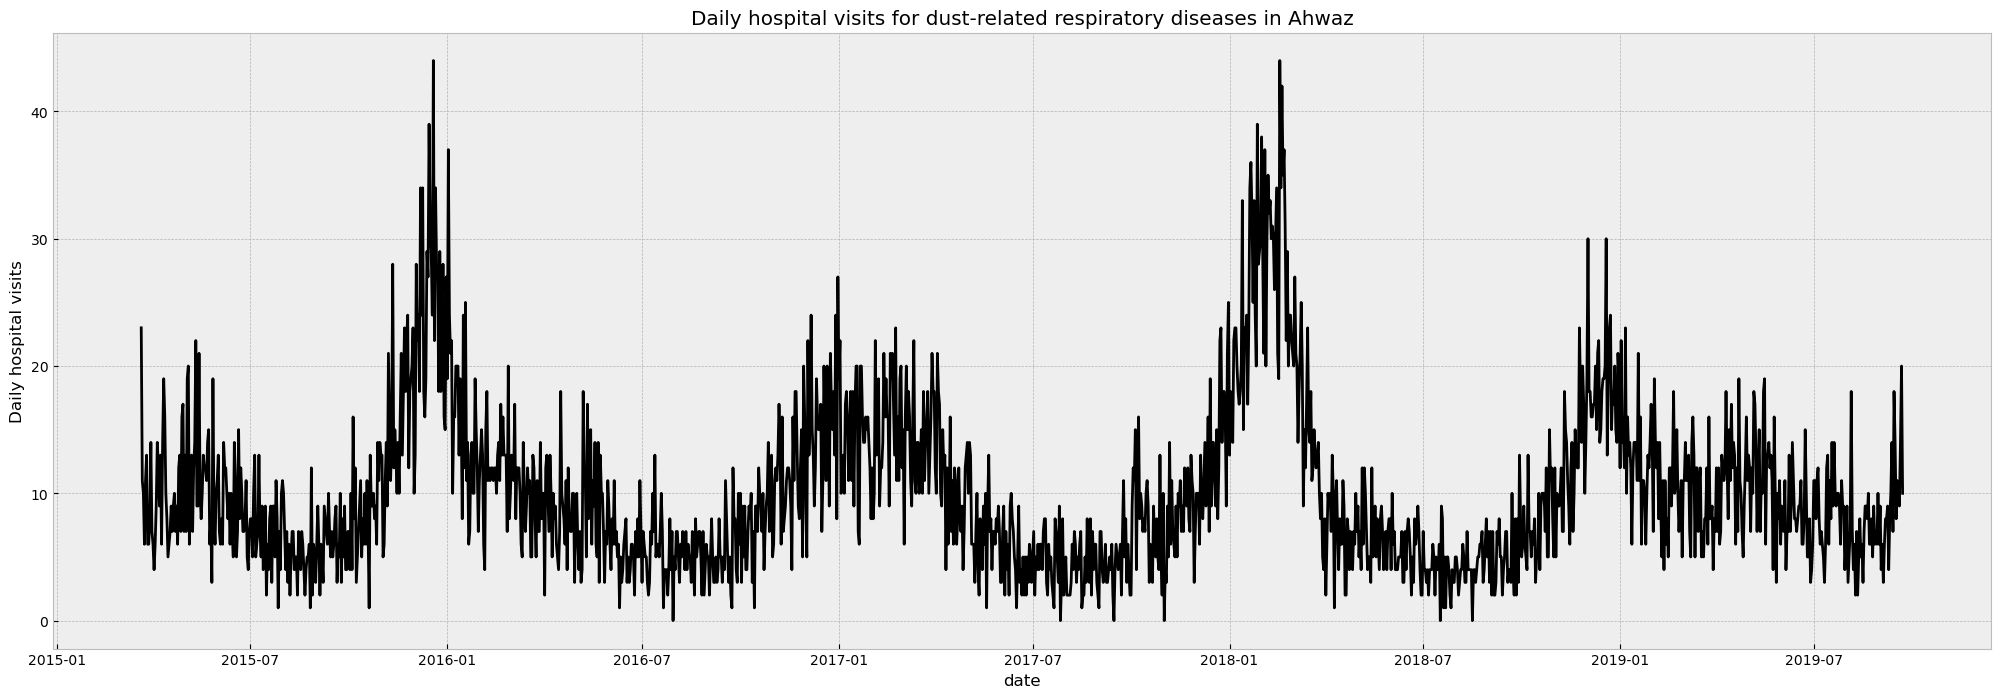

In [307]:
mpl.rcParams['figure.figsize'] = (25,8)
plt.plot(resp_visits['date'],resp_visits['resp_visits'], color='black')
plt.title('Daily hospital visits for dust-related respiratory diseases in Ahwaz')
plt.xlabel('date')
plt.ylabel('Daily hospital visits')
#plt.savefig(r'plots/2_respiratory_diseases.jpg', dpi=100)
plt.show()

In [308]:
resp_visits.isna().sum()
resp_visits = resp_visits.set_index('date') 

Text(0, 0.5, 'Daily hospital visits')

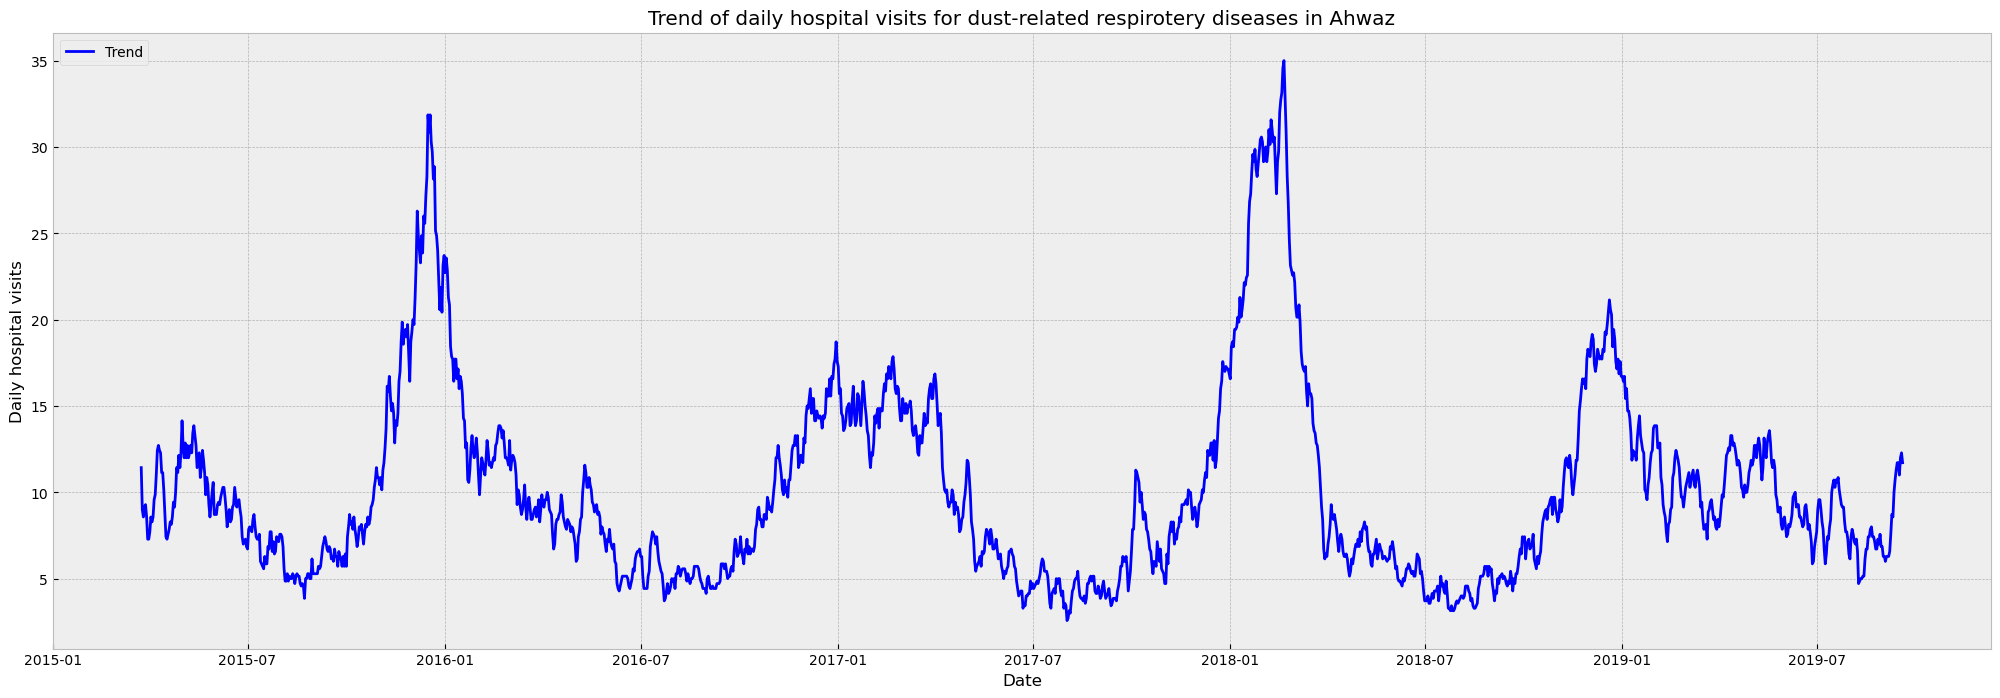

In [309]:
resp_visits_decomposed = seasonal_decompose(resp_visits['resp_visits'], model ='additive')
trend = resp_visits_decomposed.trend
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='upper left')
plt.title('Trend of daily hospital visits for dust-related respirotery diseases in Ahwaz')
plt.xlabel('Date')
plt.ylabel('Daily hospital visits')
#plt.savefig(r'plots/6_trend_all_diseases.jpg', dpi=100)


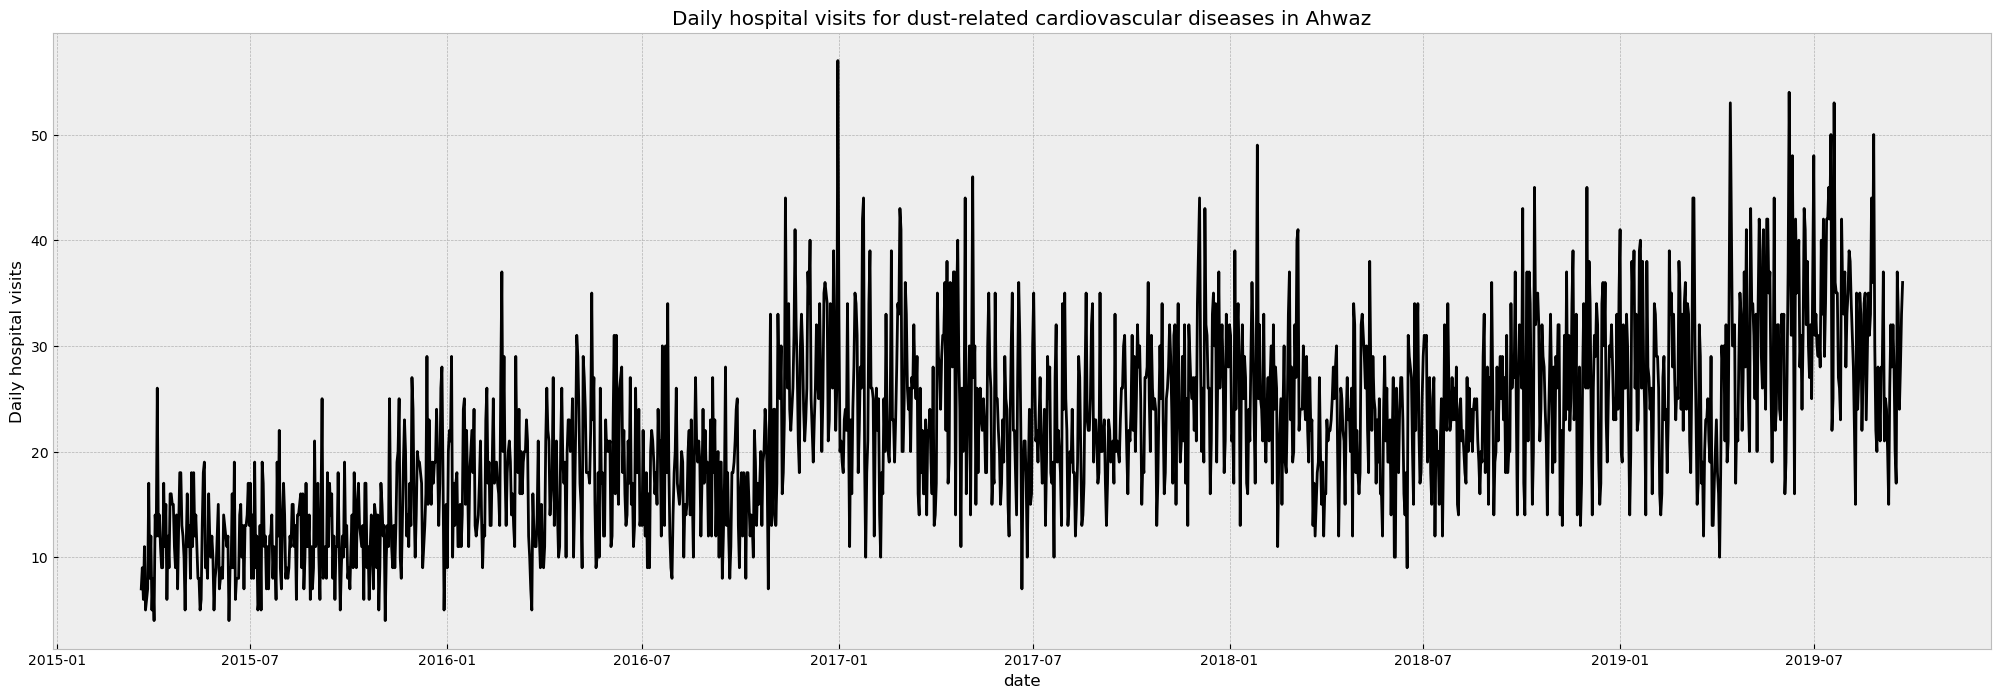

In [310]:
mpl.rcParams['figure.figsize'] = (25,8)
plt.plot(cardio_visits['date'],cardio_visits['cardio_visits'], color='black')
plt.title('Daily hospital visits for dust-related cardiovascular diseases in Ahwaz')
plt.xlabel('date')
plt.ylabel('Daily hospital visits')
#plt.savefig(r'plots/3_cardiovascular_diseases.jpg', dpi=100)
plt.show()

In [311]:
cardio_visits.isna().sum()
cardio_visits = cardio_visits.set_index('date') 

Text(0, 0.5, 'Daily hospital visits')

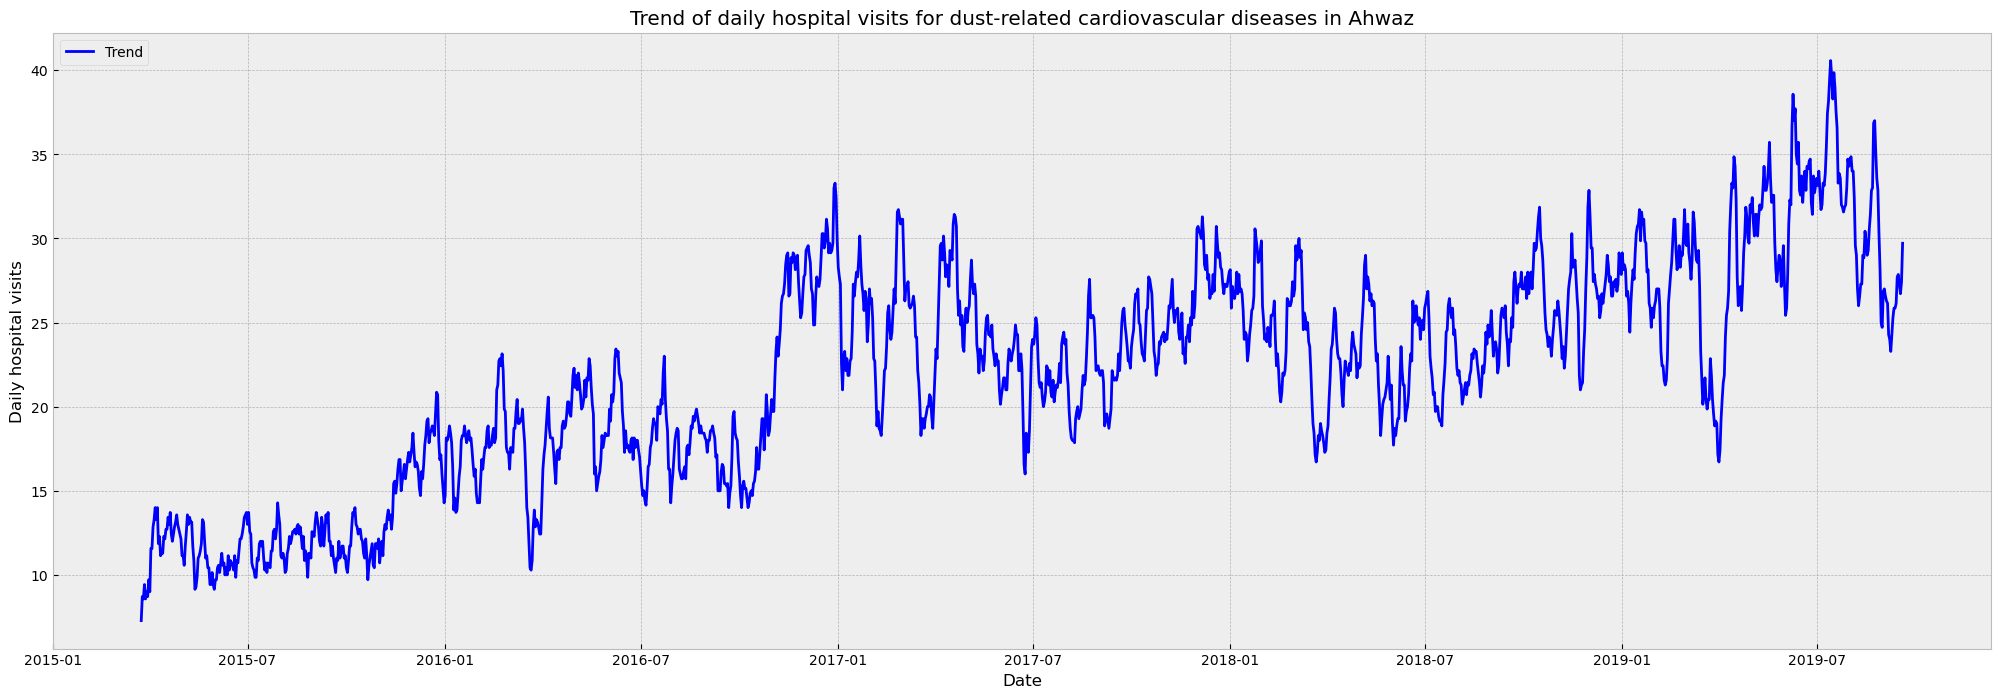

In [312]:
cardio_visits_decomposed = seasonal_decompose(cardio_visits['cardio_visits'], model ='additive')
cardio_trend = cardio_visits_decomposed.trend
plt.plot(cardio_trend, label='Trend', color='blue')
plt.legend(loc='upper left')
plt.title('Trend of daily hospital visits for dust-related cardiovascular diseases in Ahwaz')
plt.xlabel('Date')
plt.ylabel('Daily hospital visits')
#plt.savefig(r'plots/8_trend_cardio.jpg', dpi=100)


## Daily hospital visits time-series decomposion

A decomposition aims to estimate seasonal effects that can be used to create and present seasonally adjusted values. In order to see trends more clearly, seasonally adjusted values remove the seasonal effect from a value.

In [313]:
import statsmodels.api as sm

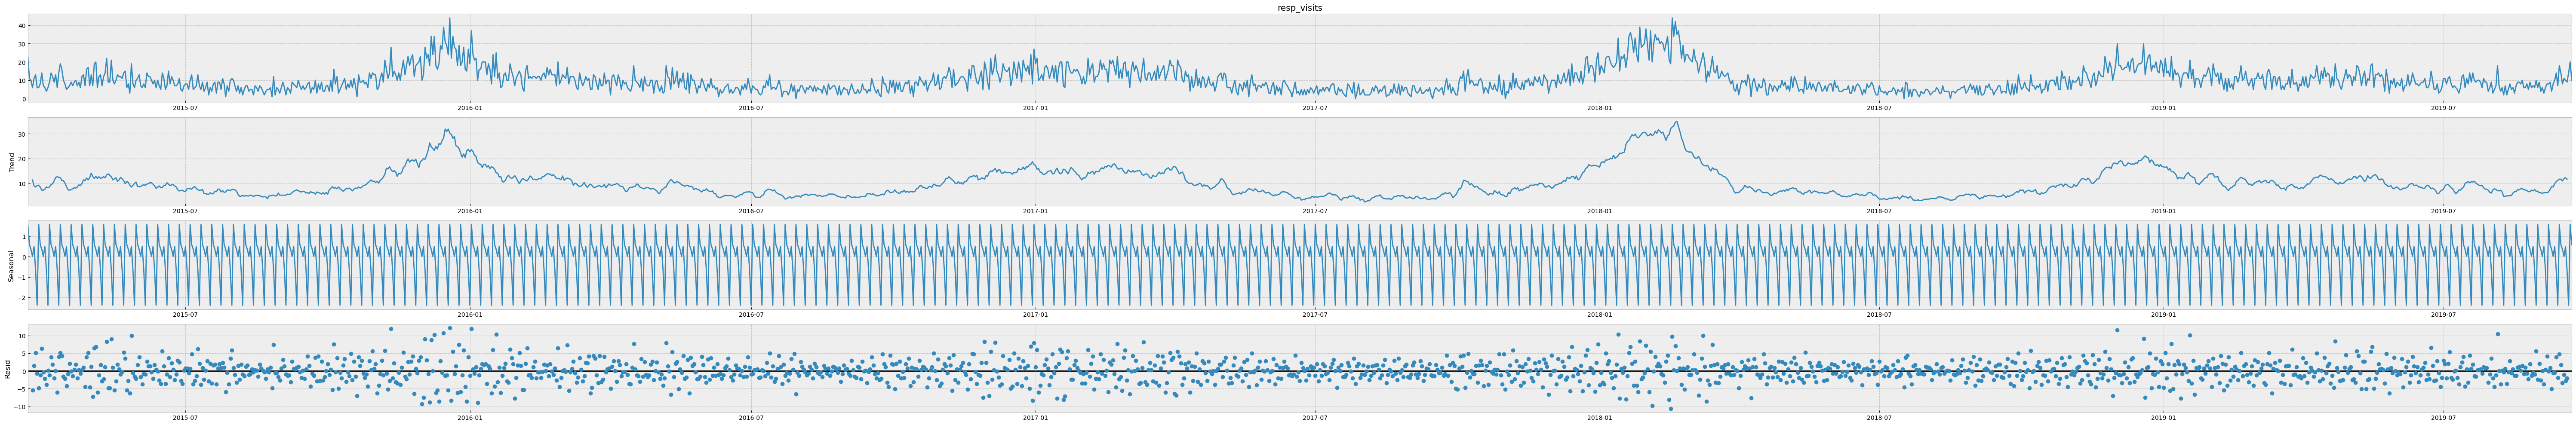

In [314]:
# Time-seires decomposition for Respirotery diseases
# We used additive model because the seasonal variation looked to be about the same magnitude across time.
# Click on the plot for higher resolution

plt.rcParams['figure.figsize'] = (60,10)
decomposition = sm.tsa.seasonal_decompose(resp_visits['resp_visits'], model='additive')

decomposition.plot()
#plt.savefig(r'plots/Daily_respirotery_visits.jpg', dpi=150)                                         
                                          
plt.show()

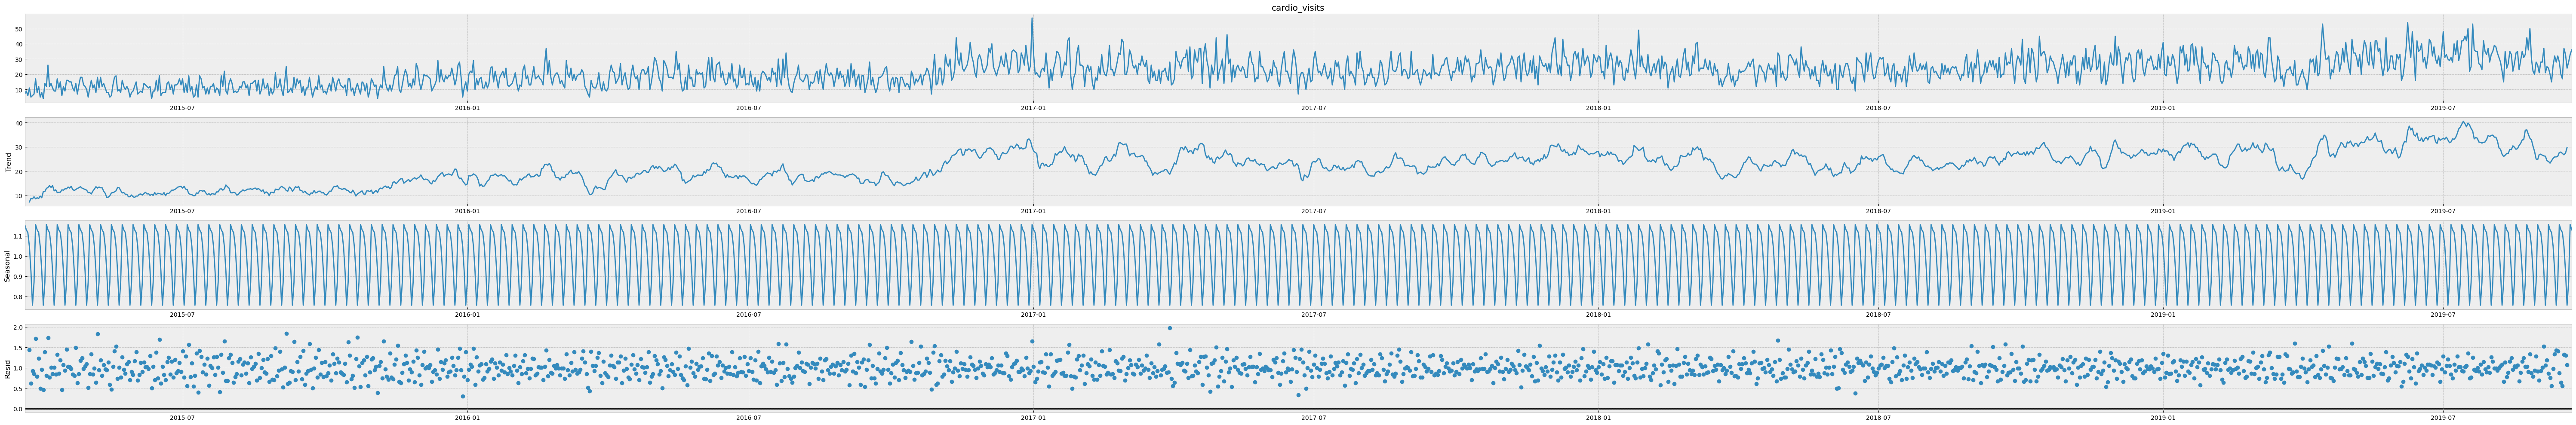

In [315]:
# Time-seires decomposition for Cardiac diseases.
# We used the multiplicative model because the magnitude of seasonal variation increases over time.
# Click on the plot for higher resolution

plt.rcParams['figure.figsize'] = (60,10)
decomposition = sm.tsa.seasonal_decompose(cardio_visits['cardio_visits'], model='multiplicative')

decomposition.plot()
#plt.savefig(r'plots/Daily_cardiovascular_visits.jpg', dpi=100)                                                                                  
plt.show()

## Box plots

Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups.

In [322]:
path_2 = R'../Data/visits_df.csv'
visits_df = pd.read_csv(path_2)

In [323]:
visits_df = visits_df.drop(['total_visits', 'skin_visits', 'eye_visits'], axis=1)
visits_df['date'] = pd.to_datetime(visits_df['date'], format='%Y/%m/%d')
visits_df = visits_df.set_index('date')

In [324]:
visits_df['year'] = [d.year for d in visits_df.index]
visits_df['month'] = [d.month for d in visits_df.index]

In [325]:
visits_df.head()

,resp_visits,cardio_visits,year,month
date,,,,
2015-03-21,23,7,2015,3
2015-03-22,11,9,2015,3
2015-03-23,10,6,2015,3
2015-03-24,6,11,2015,3
2015-03-25,11,5,2015,3


Text(0.5, 1.0, 'Yearly hospital visits for dust_related respirotery diseases')

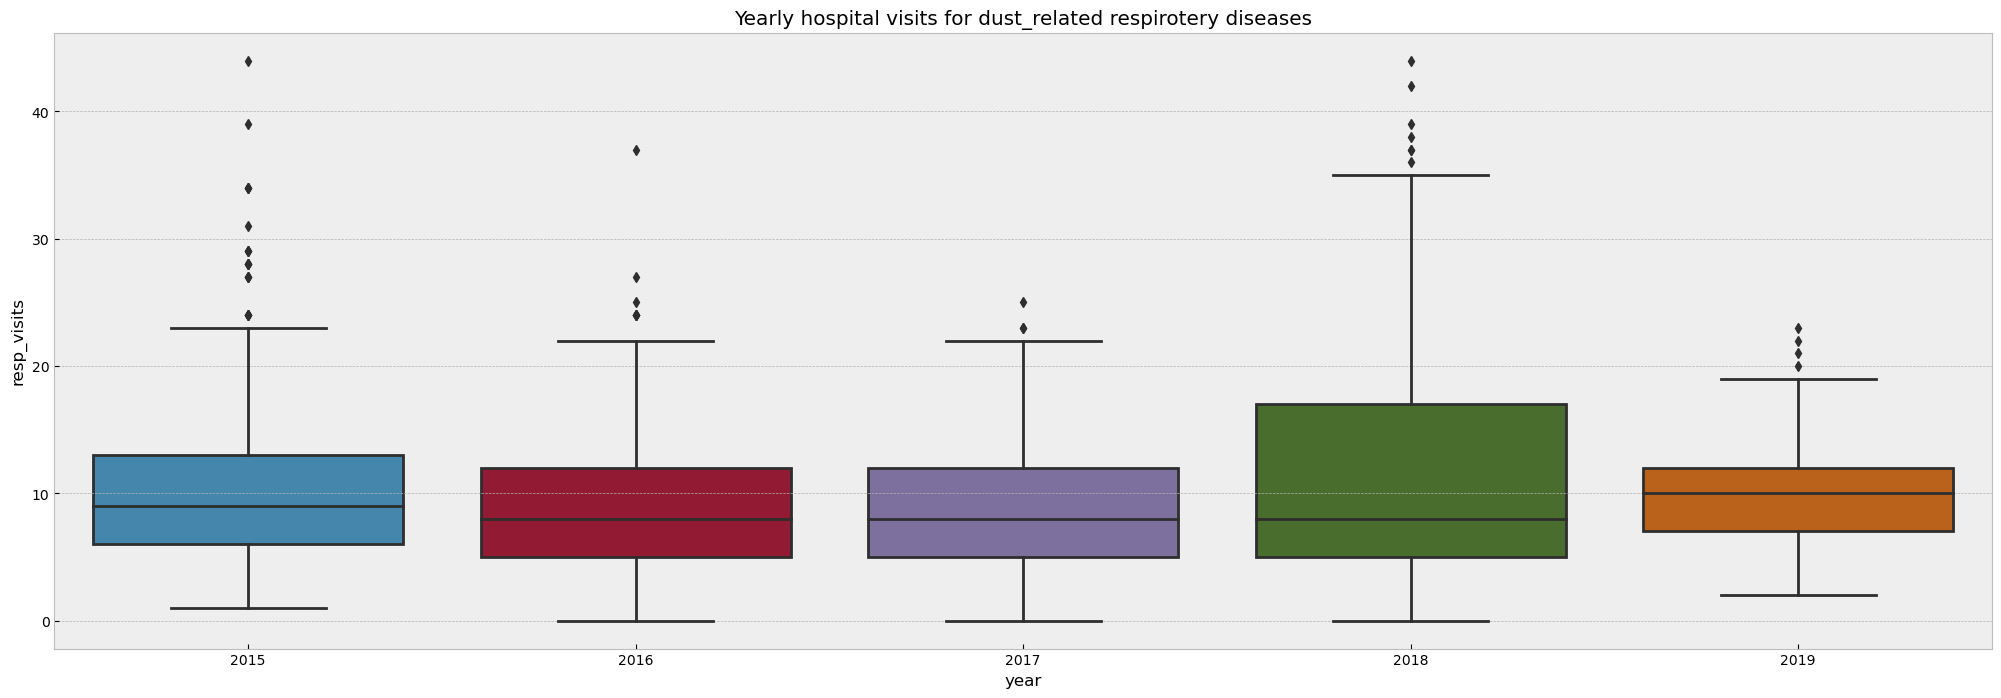

In [331]:
# Plot yearly values as boxplot
mpl.rcParams['figure.figsize'] = (25,8)
sns.boxplot(x='year', y='resp_visits', data=visits_df)
plt.title('Yearly hospital visits for dust_related respirotery diseases')

Text(0.5, 1.0, 'Monthly hospital visits for dust_related respirotery diseases')

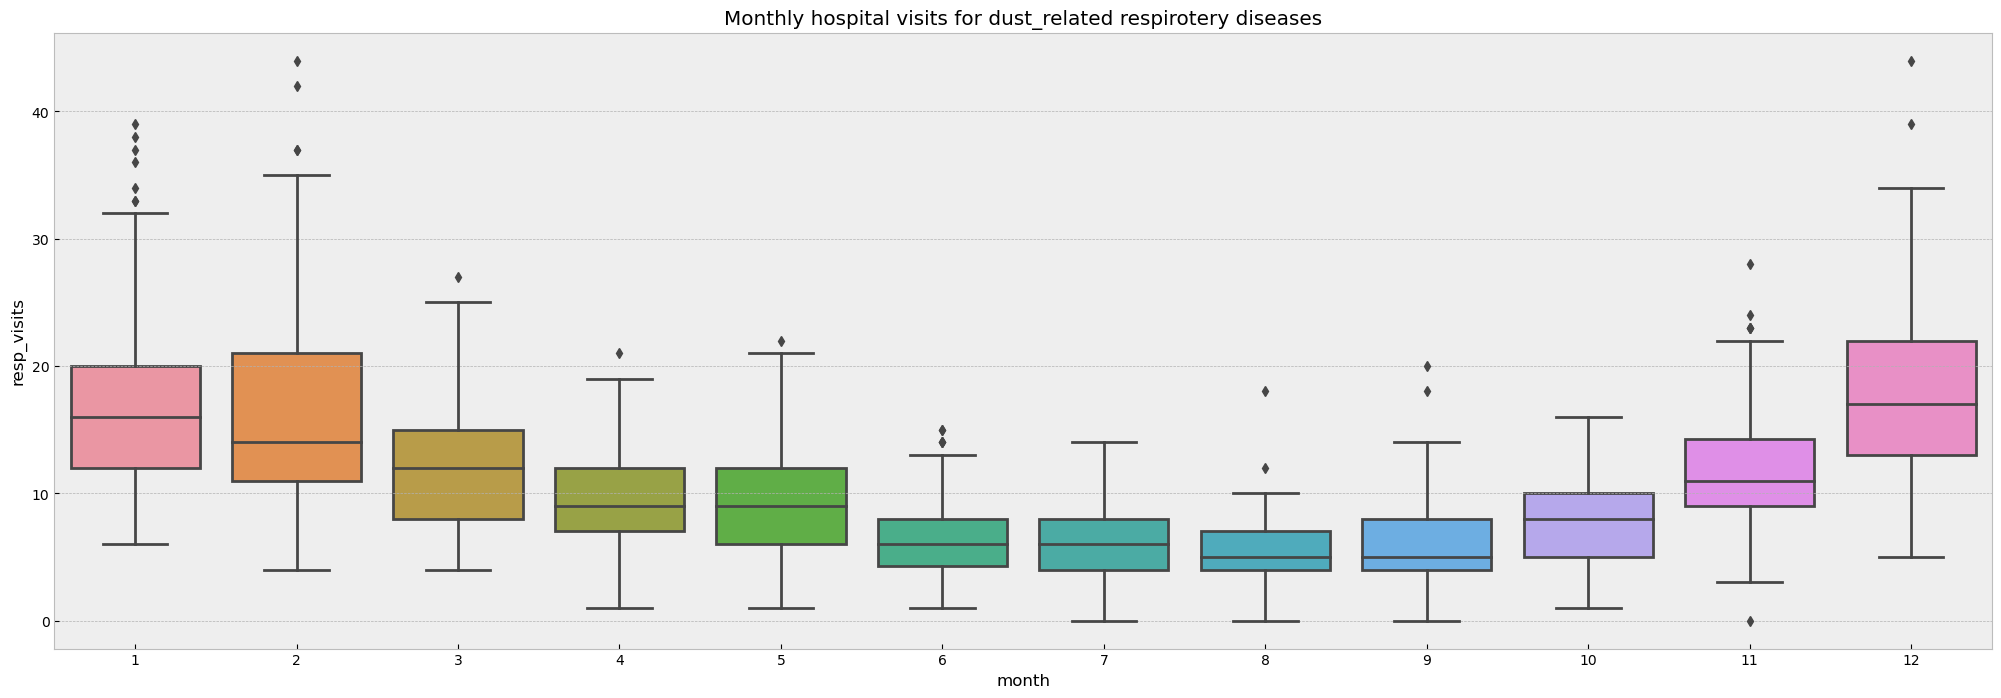

In [333]:
# Plot yearly values as boxplot
mpl.rcParams['figure.figsize'] = (25,8)
sns.boxplot(x='month', y='resp_visits', data=visits_df)
plt.title('Monthly hospital visits for dust_related respirotery diseases')

Text(0.5, 1.0, 'Yearly hospital visits for dust_related cardiovascular diseases')

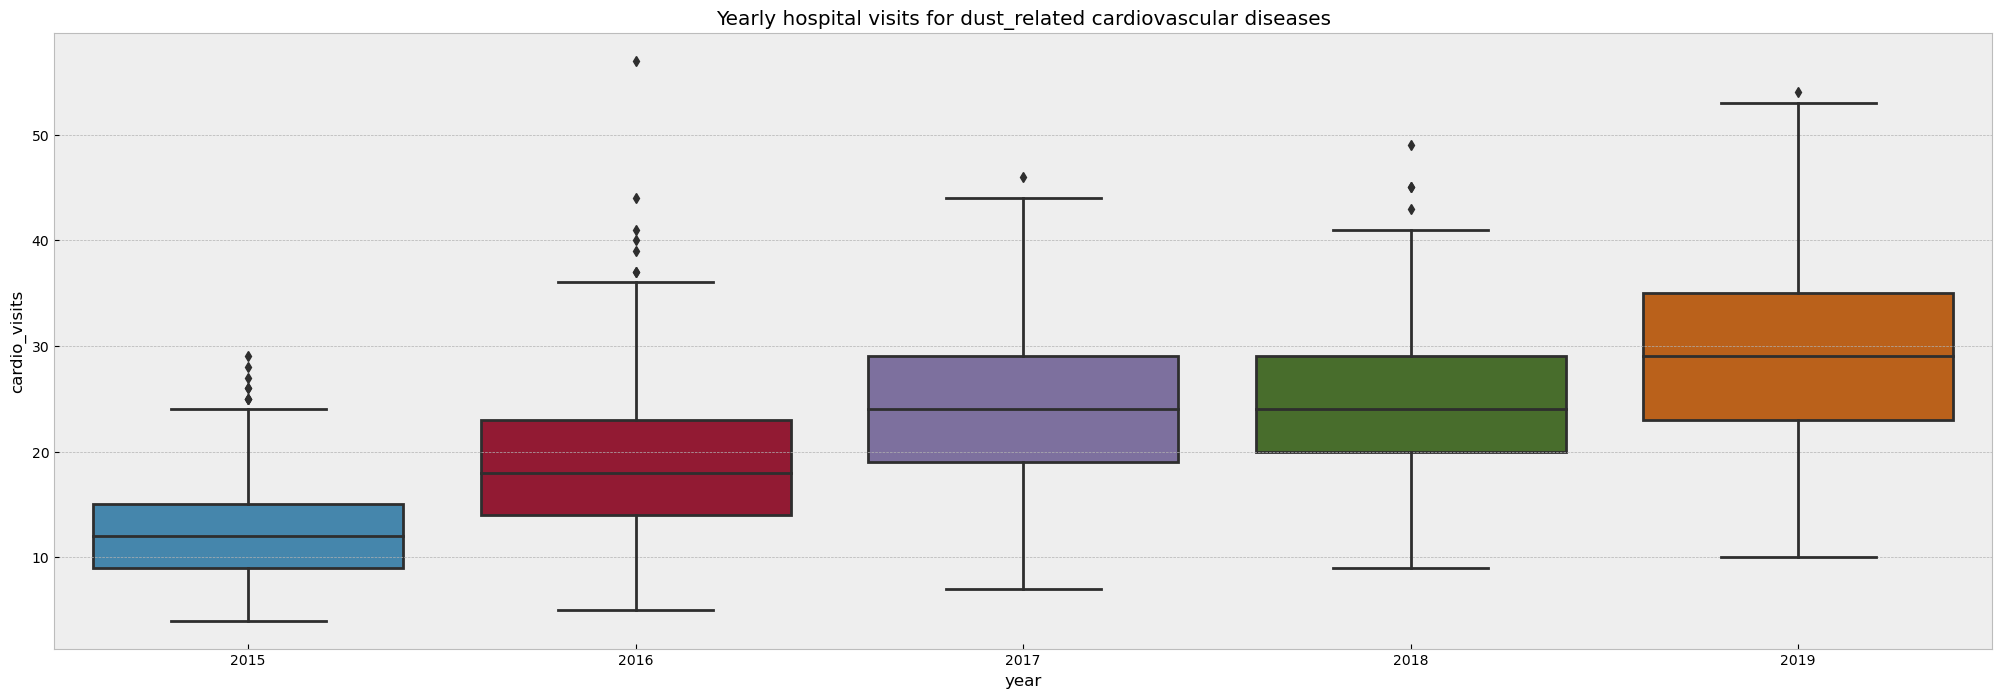

In [332]:
mpl.rcParams['figure.figsize'] = (25,8)
sns.boxplot(x='year', y='cardio_visits', data=visits_df)
plt.title('Yearly hospital visits for dust_related cardiovascular diseases')

Text(0.5, 1.0, 'Monthly hospital visits for dust_related cardiovascular diseases')

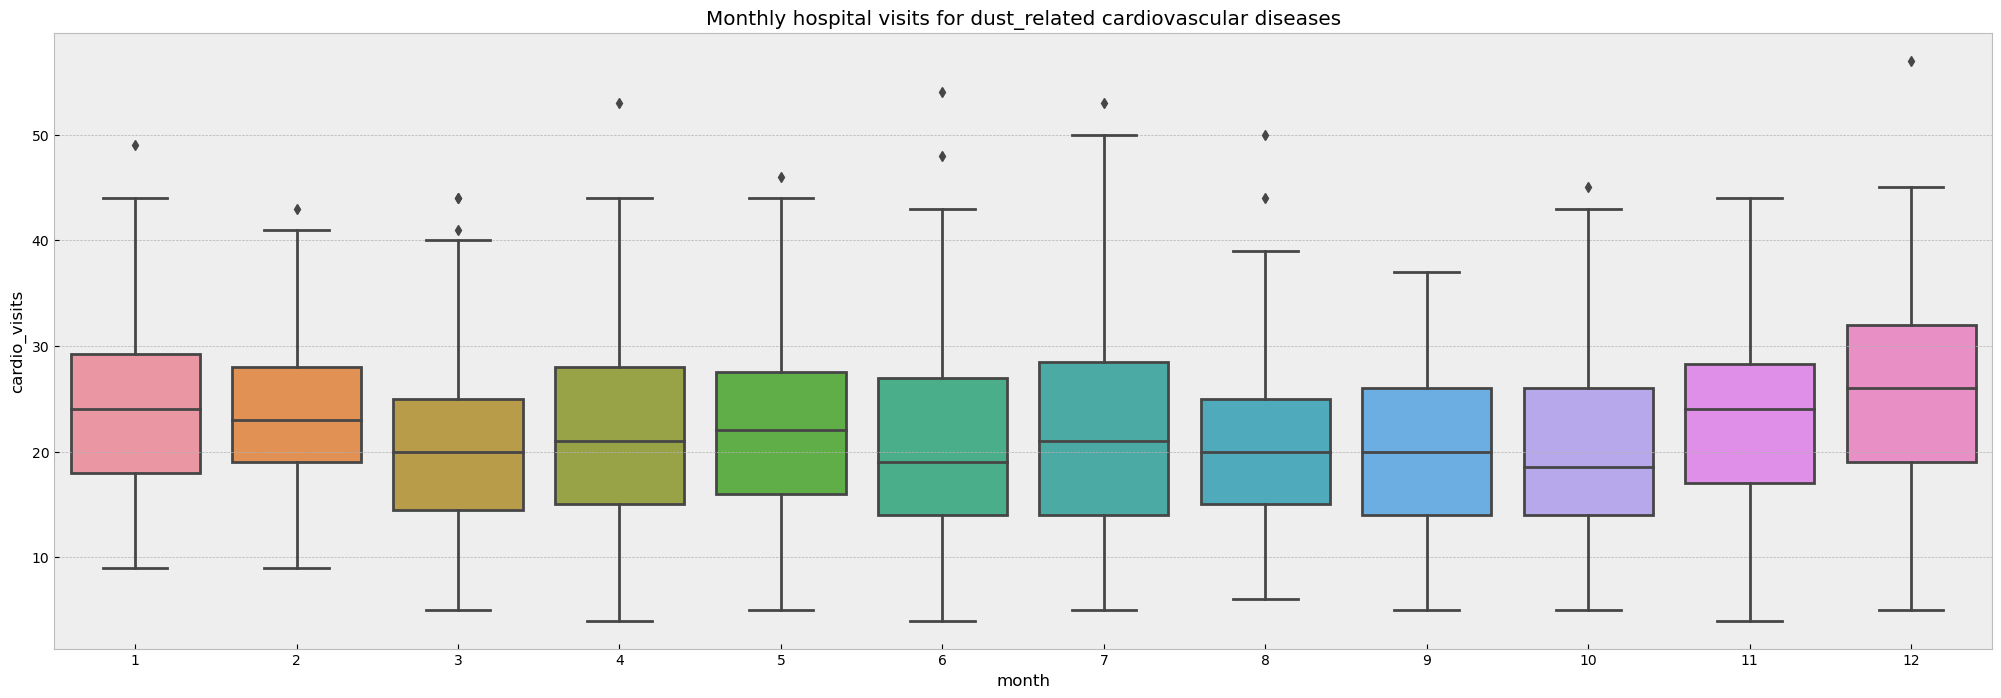

In [334]:
mpl.rcParams['figure.figsize'] = (25,8)
sns.boxplot(x='month', y='cardio_visits', data=visits_df)
plt.title('Monthly hospital visits for dust_related cardiovascular diseases')